
---

## K-Means:
- **Algoritma K-Means** adalah teknik clustering yang digunakan untuk membagi dataset menjadi \(k\) kelompok yang berbeda berdasarkan kesamaan fitur.
- Ini adalah algoritma pembelajaran mesin yang tidak terawasi, artinya tidak memerlukan label atau kategori yang telah ditentukan sebelumnya untuk melatih model.
- K-Means bekerja dengan cara mengelompokkan data berdasarkan jarak ke pusat cluster, yang diupdate iteratif untuk meminimalkan jarak intra-cluster.
- Algoritma ini bergantung pada inisialisasi pusat cluster, yang menentukan hasil akhir dari proses clustering.

### Langkah-langkah: Algoritma K-Means:
1. Tentukan jumlah cluster \(k\) yang diinginkan.
2. Inisialisasi \(k\) pusat cluster secara acak dari dataset.
3. Untuk setiap titik data dalam dataset:
   - Hitung jarak antara titik data dan setiap pusat cluster.
   - Tunjuk titik data ke pusat cluster terdekat.
4. Setelah semua titik data ditugaskan ke cluster, perbarui pusat cluster dengan menghitung rata-rata dari semua titik data yang ditugaskan ke masing-masing cluster.
5. Ulangi langkah 3 dan 4 hingga pusat cluster tidak berubah secara signifikan atau sampai jumlah iterasi maksimum tercapai.

### Efek K atau jumlah cluster:
Jumlah cluster adalah faktor penentu yang penting.

- 1. Pemilihan nilai \(k\) yang terlalu rendah dapat menyebabkan cluster yang tidak memadai, menggabungkan data yang seharusnya terpisah.
  
- 2. Sebaliknya, jika nilai \(k\) terlalu tinggi, dapat mengakibatkan overfitting, di mana model menjadi terlalu rumit dan kehilangan generalisasi terhadap data baru.

- 3. Penggunaan metode seperti **Elbow Method** dapat membantu menentukan jumlah cluster yang optimal dengan memvisualisasikan hubungan antara jumlah cluster dan total within-cluster sum of squares (WCSS).

### Bagaimana cara memilih nilai K?
Jumlah cluster \(k\) dalam K-Means adalah hiperparameter yang perlu kita pilih pada saat membangun model.

- 1) **Elbow Method**: Dengan menggambar grafik WCSS terhadap berbagai nilai \(k\), kita dapat mencari "siku" pada grafik yang menunjukkan titik di mana penambahan cluster tidak memberikan peningkatan signifikan pada WCSS.

- 2) **Silhouette Score**: Menghitung silhouette score untuk berbagai nilai \(k\) dapat memberikan informasi tentang seberapa baik titik data dalam cluster dibandingkan dengan titik data di cluster lain. Nilai silhouette yang lebih tinggi menunjukkan cluster yang lebih baik.

- 3) Meminta bantuan pakar domain juga dapat membantu dalam menentukan jumlah cluster yang optimal berdasarkan pemahaman mendalam tentang data dan tujuan analisis.

---


### Ringkasan:
#### Kelebihan:
- **K-Means** adalah algoritma yang sederhana dan mudah dipahami, membuatnya mudah diimplementasikan dan digunakan dalam berbagai aplikasi.
- Ini sangat efisien dalam hal waktu komputasi, terutama untuk dataset besar, karena kompleksitasnya adalah \(O(n \cdot k \cdot i)\), di mana \(n\) adalah jumlah data, \(k\) adalah jumlah cluster, dan \(i\) adalah jumlah iterasi.
- K-Means dapat dengan cepat mengonvergensi ke solusi, menjadikannya pilihan yang baik untuk data yang terdistribusi dengan baik.
- Algoritma ini fleksibel dan dapat diadaptasi untuk berbagai jenis data, serta dapat digunakan untuk clustering yang tidak terawasi dalam banyak domain.
- K-Means dapat memberikan hasil yang cukup baik jika cluster dalam data cukup padat dan terpisah secara jelas.

#### Kekurangan:
- Memerlukan pemilihan jumlah cluster \(k\) sebelum pelatihan, yang dapat menjadi tantangan tanpa pengetahuan sebelumnya tentang data.
- K-Means sangat sensitif terhadap inisialisasi pusat cluster; pemilihan awal pusat cluster dapat memengaruhi hasil akhir. Penggunaan algoritma seperti K-Means++ dapat membantu mengatasi masalah ini.
- Tidak cocok untuk data dengan bentuk cluster yang kompleks atau tidak berbentuk bulat, karena menganggap bahwa cluster berbentuk sferis.
- K-Means dapat kesulitan dengan outlier, yang dapat menarik pusat cluster dan mengganggu hasil clustering.
- Algoritma ini mengasumsikan bahwa semua fitur memiliki skala yang sama; jika tidak, hasil clustering dapat terdistorsi. Normalisasi data sangat dianjurkan.
- K-Means tidak memiliki kemampuan untuk menangani data yang hilang dan tidak dapat mengklasifikasikan data secara hierarkis.



In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../Data/Diabetes.csv")


print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [2]:
# Cek nilai yang hilang
print(df.isnull().sum())

# Menghapus baris dengan nilai yang hilang (opsional, sesuai analisis)
df_cleaned = df.dropna()

# Menghapus data duplikat
df_cleaned = df_cleaned.drop_duplicates()

# Mengganti nilai yang hilang dengan nilai tertentu
df_cleaned.fillna(method='ffill', inplace=True) # contoh metode forward fill


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\Ings\AppData\Local\Temp\ipykernel_6212\3385932962.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True) # contoh metode forward fill


In [3]:
df['Pregnancies'].fillna(df['Pregnancies'].mode()[0], inplace=True)  # Jika ada nilai hilang, gunakan mode
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)  # Mengisi dengan rata-rata
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)  # Mengisi dengan rata-rata
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)  # Mengisi dengan rata-rata
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)  # Mengisi dengan rata-rata
df['BMI'].fillna(df['BMI'].mean(), inplace=True)  # Mengisi dengan rata-rata
df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].mean(), inplace=True)  # Mengisi dengan rata-rata
df['Age'].fillna(df['Age'].median(), inplace=True)  # Mengisi dengan median
df['Outcome'].fillna(df['Outcome'].mode()[0], inplace=True)  # Jika ada nilai hilang, gunakan mode

# Memeriksa kembali apakah masih ada nilai yang hilang
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\Ings\AppData\Local\Temp\ipykernel_6212\603786266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pregnancies'].fillna(df['Pregnancies'].mode()[0], inplace=True)  # Jika ada nilai hilang, gunakan mode
C:\Users\Ings\AppData\Local\Temp\ipykernel_6212\603786266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [4]:
# Misal, lakukan konversi secara batch (walaupun tidak ada kolom tanggal, ini contoh format)
batch_size = 100000
for start in range(0, len(df), batch_size):
    df_batch = df.iloc[start:start+batch_size]
    
    # Jika ada kolom tanggal, konversi menggunakan pd.to_datetime
    # Contoh jika ada kolom 'Date' (ganti sesuai kebutuhan)
    # df_batch['Date'] = pd.to_datetime(df_batch['Date'], errors='coerce')

    # Mengkonversi kolom numerik jika diperlukan (contoh)
    df_batch['Glucose'] = df_batch['Glucose'].astype(float)  # Mengubah tipe data menjadi float
    df_batch['BMI'] = df_batch['BMI'].astype(float)          # Mengubah tipe data menjadi float


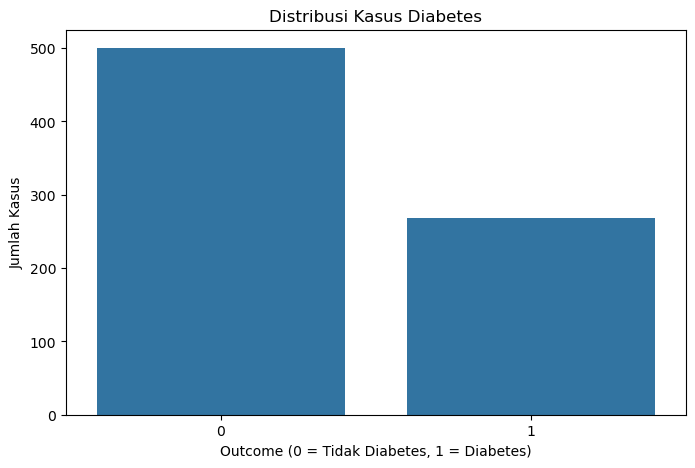

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah kasus untuk setiap jenis Outcome
outcome_counts = df['Outcome'].value_counts()

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Distribusi Kasus Diabetes')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=0)
plt.show()


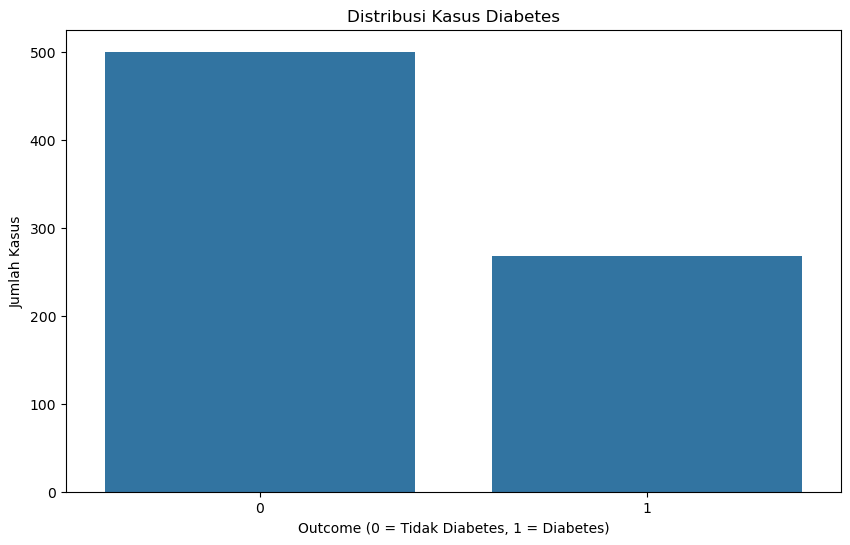

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat visualisasi distribusi Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=df)  # Menghitung jumlah kasus berdasarkan Outcome
plt.title('Distribusi Kasus Diabetes')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah Kasus')
plt.show()


In [7]:
import pandas as pd

# One-hot encoding kolom kategoris
# Karena Diabetes.csv tidak memiliki kolom kategoris seperti dalam contoh, 
# kita hanya akan menerapkan one-hot encoding jika ada kolom yang relevan.
# Jika tidak ada, kita hanya akan menggunakan fitur yang sudah ada.
df_encoded = pd.get_dummies(df, columns=['Insulin', 'SkinThickness', 'BloodPressure'], drop_first=True)

# Memilih kolom yang relevan untuk analisis dan modelling
X = df_encoded.drop(columns=['label'])  # Menghapus kolom yang tidak relevan
y = df_encoded['Outcome']  # Menggunakan 'Outcome' sebagai target label


KeyError: "['label'] not found in axis"

In [11]:
from sklearn.model_selection import train_test_split

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NameError: name 'X' is not defined

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


ValueError: could not convert string to float: '1822 0325'

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Tampilkan confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_pred' is not defined